In [3]:
# Importing a necessary libraries
# To manipulate and analyse data
import pandas as pd
# To make graphs and visualizations
import matplotlib.pyplot as plt
# For the visual representation of statistical data
import seaborn as sns
# For statistiacl calculations
import statistics

In [5]:
# Loading the CSV file into a DataFrame in Python
df = pd.read_csv('/content/master.csv')


In [6]:
#first five rows of data will be displayed
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
df.shape

(27820, 12)

In [8]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
# Group by 'country' and 'sex' to sum the suicides
gender_suicides = df.groupby(['country', 'sex'])['suicides_no'].sum().reset_index()

# Sort by suicides number to get top 10 countries for both sexes
top_10_gender_suicides = gender_suicides.sort_values(by='suicides_no', ascending=False).groupby('sex').head(10)

# Display the results
top_10_gender_suicides


,country,sex,suicides_no
151,Russian Federation,male,995412
197,United States,male,820216
93,Japan,male,555272
191,Ukraine,male,258573
92,Japan,female,251630
67,France,male,239708
150,Russian Federation,female,214330
196,United States,female,213797
71,Germany,male,211555
147,Republic of Korea,male,179115


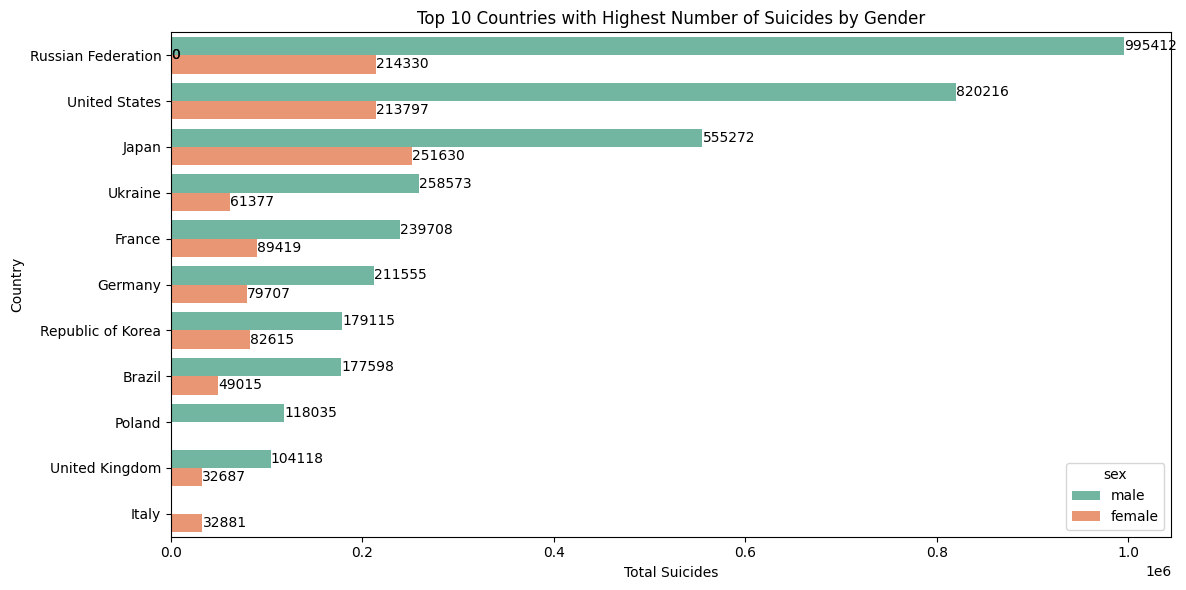

In [18]:
#Bar Plot for Top 10 Countries with Highest Number of Suicides by Gender

plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x='suicides_no', y='country', hue='sex', data=top_10_gender_suicides, palette='Set2')

# Add count labels on top of each bar
for p in ax.patches:
    # Get the width and height of the bars
    width = p.get_width()
    # Place the count label on top of the bar (adjusting the x position for better placement)
    ax.text(width + 10, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

# Title and labels
plt.title('Top 10 Countries with Highest Number of Suicides by Gender')
plt.xlabel('Total Suicides')
plt.ylabel('Country')

# Adjust the layout for better fitting
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# Group by age and sum the suicides
age_suicide_dist = df.groupby('age')['suicides_no'].sum()

# Calculate total suicides
total_suicides = age_suicide_dist.sum()

# Calculate percentage for each age group
age_suicide_percentage = (age_suicide_dist / total_suicides) * 100

# Create a summary dataframe with count and percentage
age_suicide_summary = pd.DataFrame({
    'Suicides Count': age_suicide_dist,
    'Percentage': age_suicide_percentage
})

# Display the summary
print(age_suicide_summary)


             Suicides Count  Percentage
age                                    
15-24 years          808542   11.981204
25-34 years         1123912   16.654447
35-54 years         2452141   36.336520
5-14 years            52264    0.774463
55-74 years         1658443   24.575278
75+ years            653118    9.678088


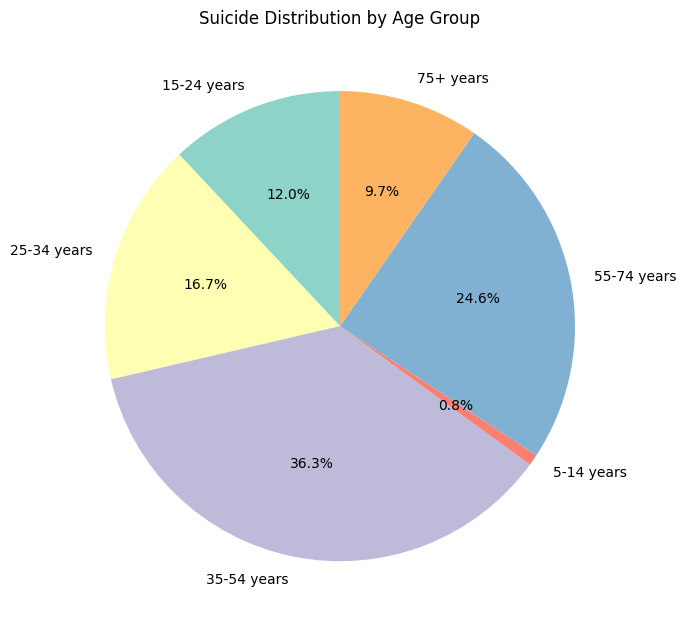

In [17]:
# Pie Chart:

plt.figure(figsize=(7, 7))

# Group by age and sum the suicides
age_suicide_dist = df.groupby('age')['suicides_no'].sum()

# Plot the pie chart
age_suicide_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(age_suicide_dist)))
plt.title('Suicide Distribution by Age Group')
plt.ylabel('')  # Remove the y-label for aesthetics
plt.tight_layout()
plt.show()


In [19]:
# Group by 'generation' and 'sex' to get the sum of suicides for each generation and sex
generation_suicides = df.groupby(['generation', 'sex'])['suicides_no'].sum().reset_index()

# Display the result
print(generation_suicides)


         generation     sex  suicides_no
0           Boomers  female       460968
1           Boomers    male      1823530
2   G.I. Generation  female       176653
3   G.I. Generation    male       333356
4      Generation X  female       309839
5      Generation X    male      1222965
6      Generation Z  female         6141
7      Generation Z    male         9765
8        Millenials  female       133620
9        Millenials    male       489839
10           Silent  female       472289
11           Silent    male      1309455


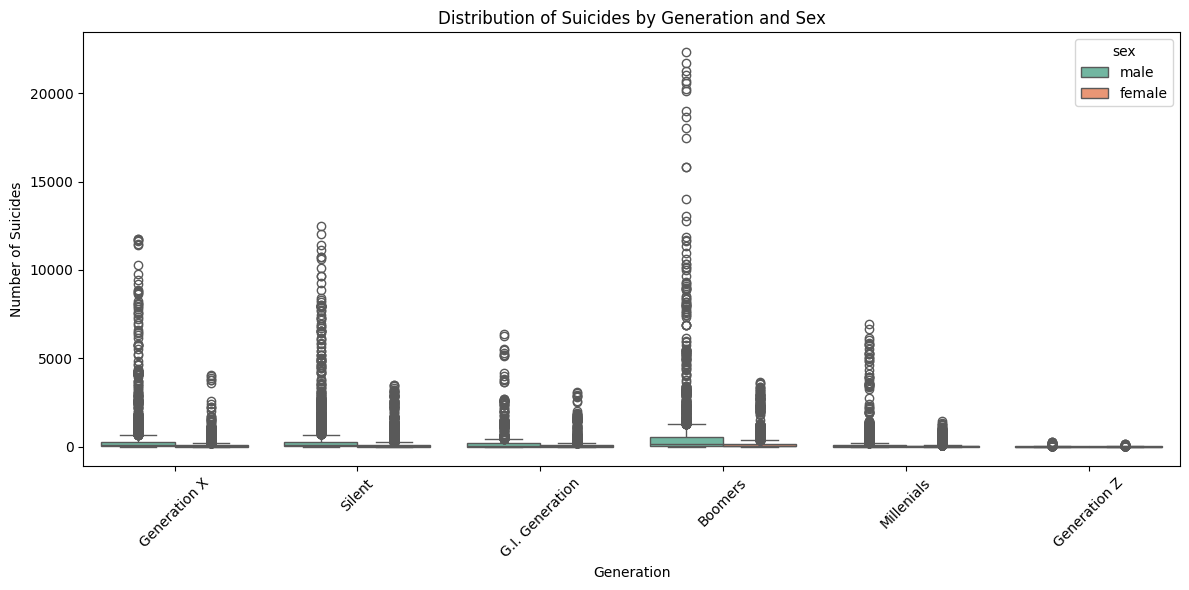

In [ ]:
#box plot to show the distribution of suicides by generation and sex
plt.figure(figsize=(12, 6))

# Box plot with hue set to 'sex' to differentiate male and female
sns.boxplot(x='generation', y='suicides_no', hue='sex', data=df, palette='Set2')

# Add titles and labels
plt.title('Distribution of Suicides by Generation and Sex')
plt.xlabel('Generation')
plt.ylabel('Number of Suicides')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


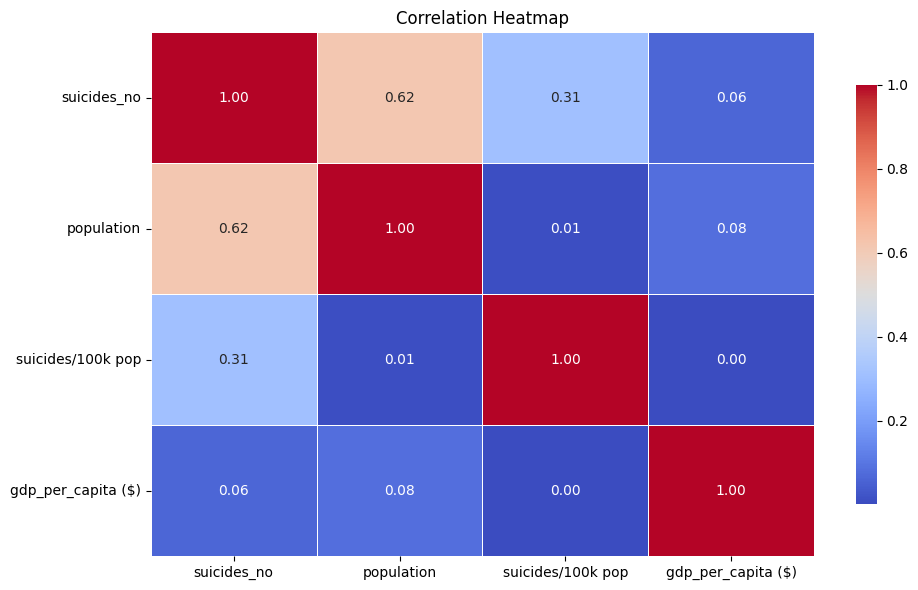

In [20]:
#Correlation Heatmap for the Dataset

# Select numeric columns for correlation analysis
numeric_columns = df[['suicides_no', 'population', 'suicides/100k pop',  'gdp_per_capita ($)']]

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
# summary statistics
print(df.describe())


               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.

In [ ]:
#Calculating mean
def mean_for_columns():

  for i in all_columns:
    mean_value = df[i].mean()
    print("Mean of", i, ":", mean_value)

all_columns = ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']
mean_for_columns()


Mean of suicides_no : 242.57440690150972
Mean of population : 1844793.6173975556
Mean of suicides/100k pop : 12.816097411933864
Mean of gdp_per_capita ($) : 16866.464414090584


In [ ]:
# calculating median

def median_for_columns():

  for i in all_columns:
    median_value = df[i].median()
    print("median of", i, ":", median_value)

all_columns = ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']
median_for_columns()

median of suicides_no : 25.0
median of population : 430150.0
median of suicides/100k pop : 5.99
median of gdp_per_capita ($) : 9372.0


In [ ]:
#Calculating standard deviation
def standard_deviation_for_columns():

  for i in all_columns:
    standard_deviation_value = df[i].std()
    print("Standard Deviation of", i, ":", standard_deviation_value)

all_columns = ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']
standard_deviation_for_columns()

Standard Deviation of suicides_no : 902.04791683365
Standard Deviation of population : 3911779.4417563686
Standard Deviation of suicides/100k pop : 18.96151101450304
Standard Deviation of gdp_per_capita ($) : 18887.57647220576


In [ ]:
#Calculating skewness
def skewness_for_columns():

  for i in all_columns:
    skewness_value = df[i].skew()
    print("skewness of", i, ":", skewness_value)

all_columns = ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']
skewness_for_columns()

skewness of suicides_no : 10.352910335856805
skewness of population : 4.459414421535874
skewness of suicides/100k pop : 2.963414476605633
skewness of gdp_per_capita ($) : 1.9634699942792686


In [ ]:
#Calculating kurtosis
def kurtosis_for_columns():

  for i in all_columns:
    kurtosis_value = df[i].kurtosis()
    print("kurtosis of", i, ":", kurtosis_value)

all_columns = ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']
kurtosis_for_columns()

kurtosis of suicides_no : 157.1688417742334
kurtosis of population : 27.407175979493353
kurtosis of suicides/100k pop : 12.165745106730158
kurtosis of gdp_per_capita ($) : 4.937757985329849
